In [12]:
#! pip install citipy

In [43]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from Config import weather_api_key

from citipy import citipy
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)

In [44]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

In [45]:
city_name_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
index_counter = 0
set_counter = 1 

In [46]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# Cities
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------") 

Beginning Data Retrieval 
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 : bethel
Processing Record 2 of Set 1 : inza
Processing Record 3 of Set 1 : barrow
Processing Record 4 of Set 1 : georgetown
Processing Record 5 of Set 1 : vaini
Processing Record 6 of Set 1 : salalah
Processing Record 7 of Set 1 : hirara
Processing Record 8 of Set 1 : new norfolk
Processing Record 9 of Set 1 : faanui
Processing Record 10 of Set 1 : rikitea
Processing Record 11 of Set 1 : novodugino
City not found. Skipping...
Processing Record 12 of Set 1 : qaanaaq
Processing Record 13 of Set 1 : itoman
Processing Record 14 of Set 1 : lubuk pakam
Processing Record 15 of Set 1 : flinders
Processing Record 16 of Set 1 : nanortalik
Processing Record 17 of Set 1 : kapaa
Processing Record 18 of Set 1 : sola
Processing Record 19 of Set 1 : mataura
Processing Record 20 of Set 1 : atuona
Processing Record 21 of Set 1 : bonthe
Processing Record 22 of Set 1 : laguna
Processing Record

Processing Record 32 of Set 4 : honiara
Processing Record 33 of Set 4 : tecolutla
Processing Record 34 of Set 4 : saldanha
Processing Record 35 of Set 4 : kavieng
Processing Record 36 of Set 4 : geraldton
Processing Record 37 of Set 4 : pilar
Processing Record 38 of Set 4 : cap malheureux
Processing Record 39 of Set 4 : sakakah
Processing Record 40 of Set 4 : carnarvon
Processing Record 41 of Set 4 : vostok
Processing Record 42 of Set 4 : kosh-agach
Processing Record 43 of Set 4 : antsohihy
Processing Record 44 of Set 4 : cockburn town
Processing Record 45 of Set 4 : iqaluit
Processing Record 46 of Set 4 : bilibino
Processing Record 47 of Set 4 : bindura
Processing Record 48 of Set 4 : minab
Processing Record 49 of Set 4 : kapoeta
Processing Record 50 of Set 4 : mariahu
Processing Record 0 of Set 5 : ancud
Processing Record 1 of Set 5 : paamiut
Processing Record 2 of Set 5 : novikovo
Processing Record 3 of Set 5 : paragominas
Processing Record 4 of Set 5 : muravlenko
Processing Record 

Processing Record 21 of Set 8 : les cayes
Processing Record 22 of Set 8 : krasnovishersk
City not found. Skipping...
Processing Record 23 of Set 8 : marovoay
Processing Record 24 of Set 8 : tura
Processing Record 25 of Set 8 : chirnogeni
Processing Record 26 of Set 8 : manado
Processing Record 27 of Set 8 : dunedin
Processing Record 28 of Set 8 : parfenyevo
Processing Record 29 of Set 8 : mwense
Processing Record 30 of Set 8 : kysyl-syr
Processing Record 31 of Set 8 : sindor
Processing Record 32 of Set 8 : jumla
Processing Record 33 of Set 8 : vardo
Processing Record 34 of Set 8 : qui nhon
City not found. Skipping...
City not found. Skipping...
Processing Record 35 of Set 8 : dinghai
Processing Record 36 of Set 8 : fukue
Processing Record 37 of Set 8 : akdepe
Processing Record 38 of Set 8 : sinnamary
Processing Record 39 of Set 8 : saint george
Processing Record 40 of Set 8 : teguldet
Processing Record 41 of Set 8 : ternate
City not found. Skipping...
Processing Record 42 of Set 8 : st

Processing Record 5 of Set 12 : turkmenabat
City not found. Skipping...
Processing Record 6 of Set 12 : sisimiut
Processing Record 7 of Set 12 : orlik
Processing Record 8 of Set 12 : bamiantong
Processing Record 9 of Set 12 : mombetsu
Processing Record 10 of Set 12 : carballo
Processing Record 11 of Set 12 : lubao
Processing Record 12 of Set 12 : mahon
City not found. Skipping...
Processing Record 13 of Set 12 : tucuman
Processing Record 14 of Set 12 : tongchuan
Processing Record 15 of Set 12 : corinto
Processing Record 16 of Set 12 : burnie
Processing Record 17 of Set 12 : sarany
Processing Record 18 of Set 12 : bursa
Processing Record 19 of Set 12 : hofn
Processing Record 20 of Set 12 : angoche
Processing Record 21 of Set 12 : jamalpur
Processing Record 22 of Set 12 : anshun
Processing Record 23 of Set 12 : tual
Processing Record 24 of Set 12 : jawhar
Processing Record 25 of Set 12 : naron
Processing Record 26 of Set 12 : hualmay
-----------------------------
Data Retrieval Complete


In [47]:
weather = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list,
})

In [48]:
#Export the city data into a .csv.
weather.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [49]:
#.csv
weather.to_csv("output_data/cities.csv", index = False)

In [70]:
#Display the DataFrame
weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.37,-73.41,70.00,94,1,3.36,US,1595650678
1,Inza,53.85,46.36,60.06,69,28,3.74,RU,1595650925
2,Barrow,71.29,-156.79,35.60,80,90,9.17,US,1595650925
3,George Town,5.41,100.34,87.80,74,20,2.24,MY,1595650878
4,Vaini,-21.20,-175.20,71.60,88,75,8.05,TO,1595650925


In [51]:
 #Inspect the data and remove the cities where the humidity > 100%.

#Skip this step if there are no cities that have humidity > 100%.

In [52]:
#  Get the indices of cities that have humidity over 100%.

In [53]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [54]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


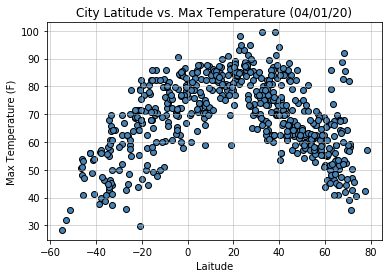

In [55]:
 #Latitude vs. Temperature Plot
    
plt.scatter(weather["Lat"], weather["Max Temp"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Max Temperature.png")

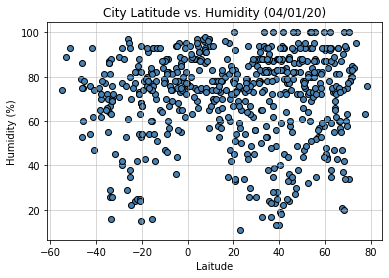

In [56]:
#Latitude vs. Humidity Plot

plt.scatter(weather["Lat"], weather["Humidity"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Humidity.png")

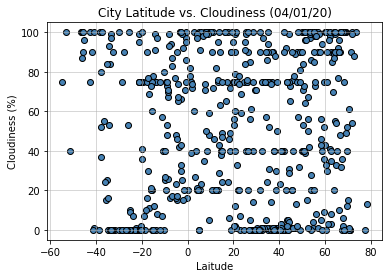

In [57]:
 #Latitude vs. Cloudiness Plot
plt.scatter(weather["Lat"], weather["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Cloudiness.png")

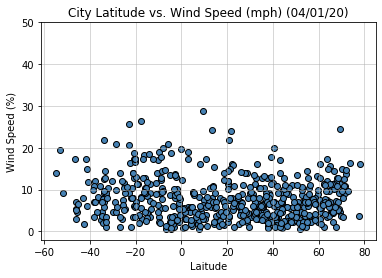

In [58]:
 #Latitude vs. Wind Speed Plot
plt.scatter(weather["Lat"], weather["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (mph) (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Wind Speed (mph).png")

In [59]:
 #Linear Regression
 # OPTIONAL: Create a function to create Linear Regression plots

In [60]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather.loc[weather["Lat"] >= 0]
southern_hemisphere = weather.loc[weather["Lat"] < 0]

In [61]:
#regression start for plots
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.65


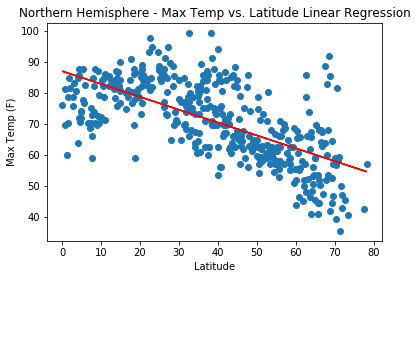

In [62]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-squared is : 0.7


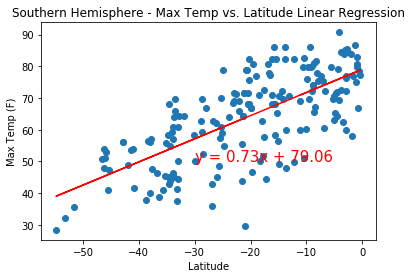

In [63]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

annotate(equation, -30, 50)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-squared is : -0.08


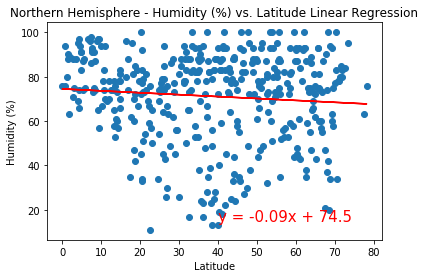

In [64]:
 #Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

annotate(equation, 40, 15)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.14


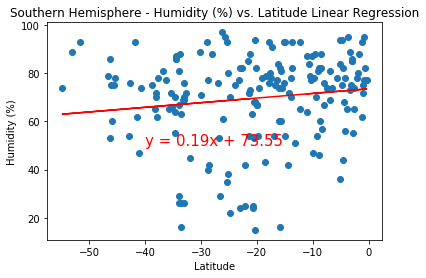

In [65]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

annotate(equation, -40, 50)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : -0.02


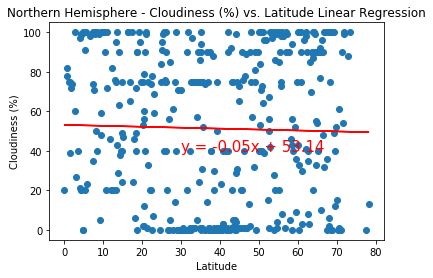

In [66]:
 #Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

annotate(equation, 30, 40)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.06


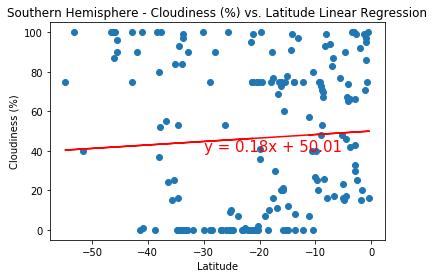

In [67]:
 #Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

annotate(equation, -30, 40)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.08


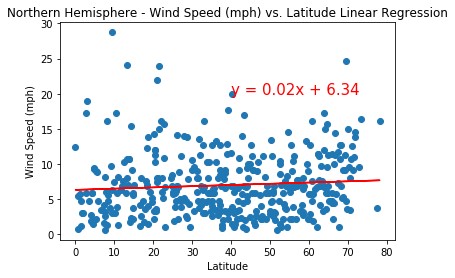

In [68]:
 #Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

annotate(equation, 40, 20)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-squared is : -0.03


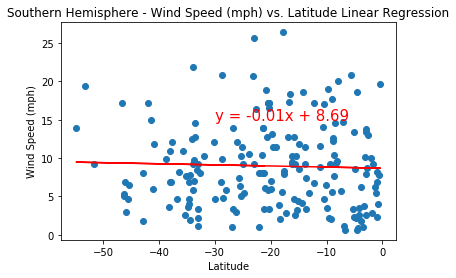

In [69]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

annotate(equation, -30, 15)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")